# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### <font color = blue> The data used in the study represents a total of 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010.</font>

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from time import time
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, recall_score, classification_report


In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
missing_values = df.isnull().sum()
unknown_values = df.apply(lambda x: (x == 'unknown').sum() if x.dtype == 'object' else 0)

missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of analyzing this dataset is to predict whether a bank client will subscribe to a term deposit. This is a binary classification problem where the target variable is 'y', indicating 'yes' or 'no' for subscribing to the term deposit. 

By successfully predicting this outcome, the bank can more effectively target its marketing campaigns towards clients who are more likely to subscribe, thereby optimizing marketing resources and increasing the success rate of its campaigns. This can lead to enhanced customer targeting, improved customer relationships, and potentially increased revenue for the bank.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
# Selecting the columns for the feature set
features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
target = df['y']

In [7]:
features.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [8]:
# Encode Job
job_mapping = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 2,
    'housemaid': 3,
    'management': 4,
    'retired': 5,
    'self-employed': 6,
    'services': 7,
    'student': 8,
    'technician': 9,
    'unemployed': 10,
    'unknown': 11
}
features_encoded = features.copy() 
features_encoded['job'] = features['job'].map(job_mapping)

In [9]:
features_encoded.head()

,age,job,marital,education,default,housing,loan
0,56,3,married,basic.4y,no,no,no
1,57,7,married,high.school,unknown,no,no
2,37,7,married,high.school,no,yes,no
3,40,0,married,basic.6y,no,no,no
4,56,7,married,high.school,no,no,yes


In [10]:
# encode marital
marital_mapping = {
    'divorced': 0,  # Includes 'divorced' or 'widowed'
    'married': 1,
    'single': 2,
    'unknown': 3
}

# Apply the mapping
features_encoded['marital'] = features['marital'].map(marital_mapping)
features_encoded.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,basic.4y,no,no,no
1,57,7,1,high.school,unknown,no,no
2,37,7,1,high.school,no,yes,no
3,40,0,1,basic.6y,no,no,no
4,56,7,1,high.school,no,no,yes


In [11]:
# encode education
education_mapping = {
    'basic.4y': 0,
    'basic.6y': 1,
    'basic.9y': 2,
    'high.school': 3,
    'illiterate': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': 7
}

# Apply the mapping
features_encoded['education'] = features['education'].map(education_mapping)
# Check the results
features_encoded.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,no,no,no
1,57,7,1,3,unknown,no,no
2,37,7,1,3,no,yes,no
3,40,0,1,1,no,no,no
4,56,7,1,3,no,no,yes


In [12]:
# encode default
default_mapping = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
features_encoded['default'] = features['default'].map(default_mapping)
features_encoded['housing'] = features['housing'].map(default_mapping)
features_encoded['loan'] = features['loan'].map(default_mapping)
features_encoded.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,2,0,0
2,37,7,1,3,0,1,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,1


In [13]:
# Prepare the Target Variable

target_mapping = {
    'no': 0,
    'yes': 1
}
target_encoded = target.map(target_mapping)
target_encoded.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.25, random_state=99)

# Checking the size of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((30891, 7), (10297, 7), (30891,), (10297,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
# Calculating the majority class baseline
majority_class = y_train.mode()[0]
baseline_accuracy = (y_train == majority_class).mean()

majority_class, baseline_accuracy


(0, 0.8870544818879286)

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
# Instantiate the Logistic Regression model

start_time = time()
model_LR = LogisticRegression().fit(X_train, y_train)
train_time = time() - start_time


In [17]:
# Predict on the test set
y_pred = model_LR.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

### Based on the results below, it seems the model always outputs a negative prediction. The accuracy is basically the same as the percentage of negative samples. This is not a helpful model. 

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8882198698650092

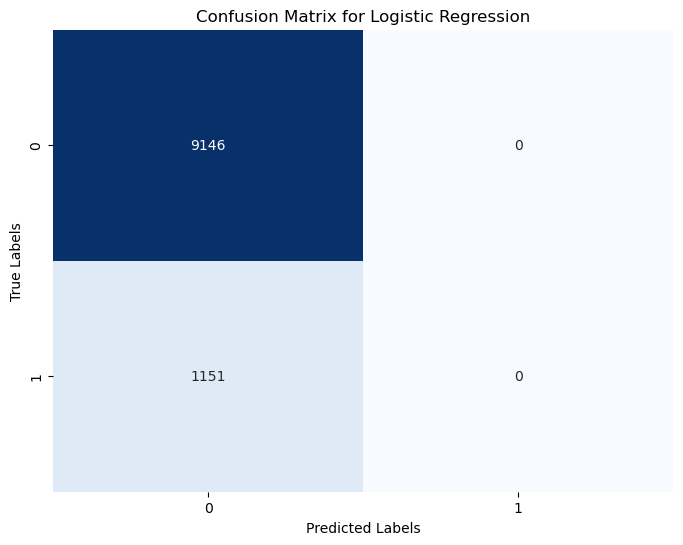

In [19]:
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [20]:
# Store results in a dictionary, excluding SVM due to previous timeout
results = {
    'Model': [],
    'Train Time': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

In [21]:
train_accuracy = accuracy_score(y_train, model_LR.predict(X_train))
    
    # Testing accuracy
test_accuracy = accuracy_score(y_test, model_LR.predict(X_test))
    
    # Store results
results['Model'].append('Logistic Regression')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.88822


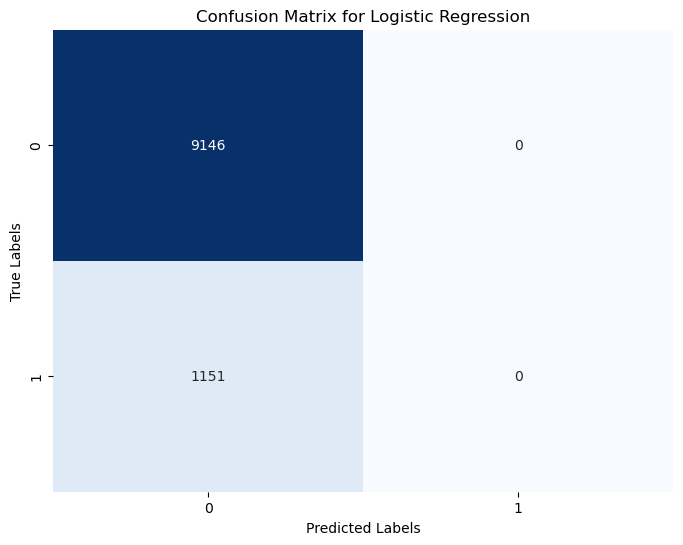

In [22]:
y_true = y_test
y_pred = model_LR.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [23]:
model_DT = DecisionTreeClassifier()

In [24]:
# Evaluate each model

start_time = time()
model_DT.fit(X_train, y_train)
train_time = time() - start_time
    
    # Training accuracy
train_accuracy = accuracy_score(y_train, model_DT.predict(X_train))
    
    # Testing accuracy
test_accuracy = accuracy_score(y_test, model_DT.predict(X_test))
    
    # Store results
results['Model'].append('Decision Tree')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.88822
1,Decision Tree,0.101504,0.917743,0.86598


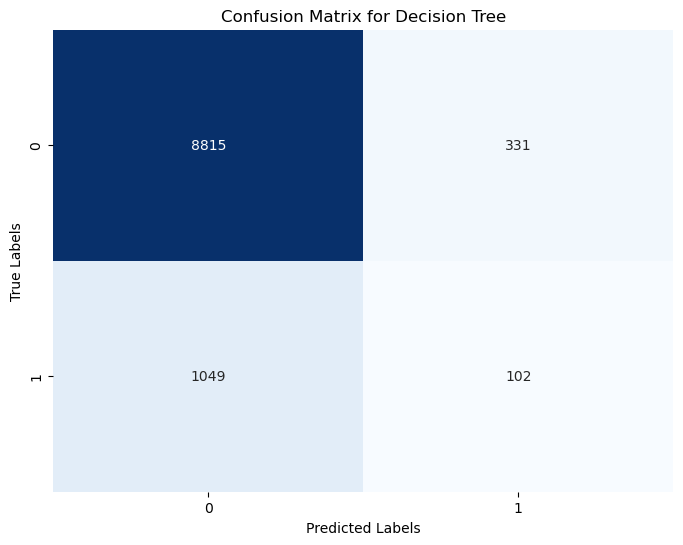

In [25]:
y_true = y_test
y_pred = model_DT.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [26]:
#SVC
start_time = time()
model_SVC = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', SVC(probability = True, max_iter=10000))
    ])

model_SVC.fit(X_train, y_train)
train_time = time() - start_time  

C:\Users\Shadow\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [27]:
train_accuracy = model_SVC.score(X_train, y_train)
test_accuracy = model_SVC.score(X_test, y_test)
print(f"Training Time for SVM: {train_time:.4f} seconds")
print(f"Training Accuracy for SVM: {train_accuracy:.4f}")
print(f"Test Accuracy for SVM: {test_accuracy:.4f}")

Training Time for SVM: 156.4040 seconds
Training Accuracy for SVM: 0.8873
Test Accuracy for SVM: 0.8882


In [28]:
results['Model'].append('SVM')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.88822
1,Decision Tree,0.101504,0.917743,0.86598
2,SVM,156.403996,0.887281,0.88822


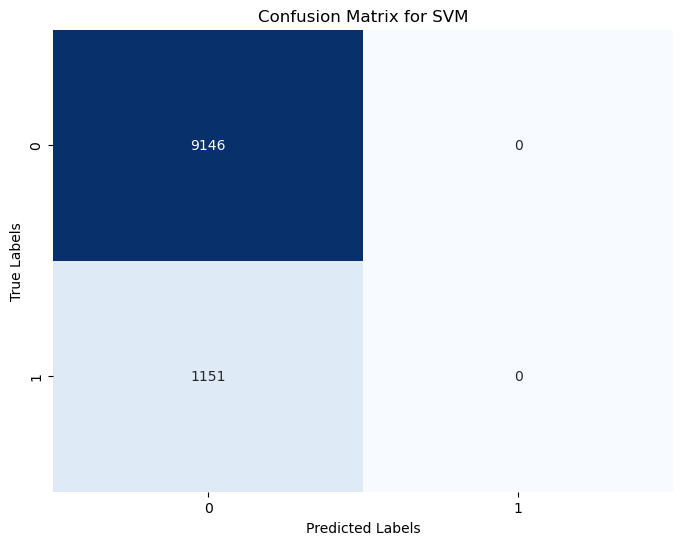

In [29]:
y_true = y_test
y_pred = model_SVC.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

In [30]:
#KNN5
start_time = time()
model_KNN5 = Pipeline([
    ('scale', StandardScaler()), 
    ('model', KNeighborsClassifier(n_neighbors=5))
]).fit(X_train, y_train)

train_time = time() - start_time  

train_accuracy = model_KNN5.score(X_train, y_train)
test_accuracy = model_KNN5.score(X_test, y_test)
print(f"Training Time for KNN5: {train_time:.4f} seconds")
print(f"Training Accuracy for KNN5: {train_accuracy:.4f}")
print(f"Test Accuracy for KNN5: {test_accuracy:.4f}")


Training Time for KNN5: 0.1325 seconds
Training Accuracy for KNN5: 0.8906
Test Accuracy for KNN5: 0.8780


In [31]:
results['Model'].append('KNN5')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023


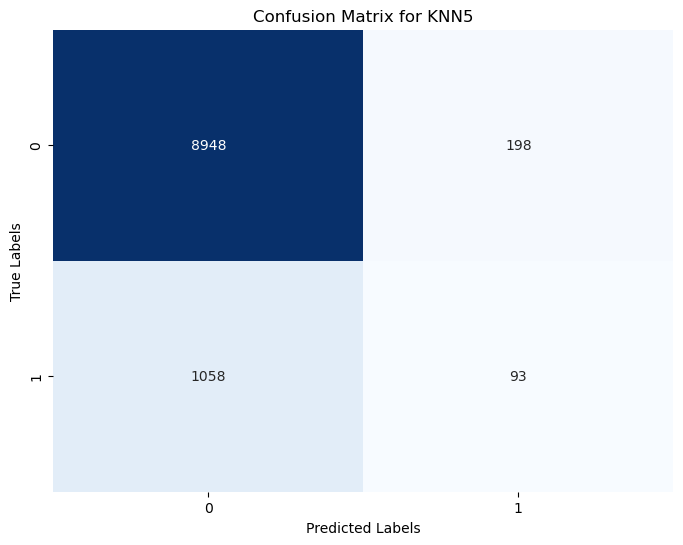

In [32]:
y_true = y_test
y_pred = model_KNN5.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN5')
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [33]:
features_encoded.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,2,0,0
2,37,7,1,3,0,1,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,1


### Removing 'marital' column to retrain the models
The results show that 'marital' column does not appear to affect the models' accuracy. 

In [34]:
# Encode Other Categorical Variables
updated_features_encoded = features_encoded
updated_features_encoded = updated_features_encoded.drop('marital', axis=1)
updated_features_encoded.head()

,age,job,education,default,housing,loan
0,56,3,0,0,0,0
1,57,7,3,2,0,0
2,37,7,3,0,1,0
3,40,0,1,0,0,0
4,56,7,3,0,0,1


In [35]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(updated_features_encoded, target_encoded, test_size=0.25, random_state=42)

# Checking the size of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30891, 6), (10297, 6), (30891,), (10297,))

In [36]:
start_time = time()
model_LR = LogisticRegression(max_iter=10000).fit(X_train, y_train)
train_time = time() - start_time
# Predict on the test set
y_pred = model_LR.predict(X_test)
# Calculate accuracy

train_time = time() - start_time  

train_accuracy = model_LR.score(X_train, y_train)
test_accuracy = model_LR.score(X_test, y_test)
results['Model'].append('Logic Regression without marital')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)

results_df = pd.DataFrame(results)
results_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026


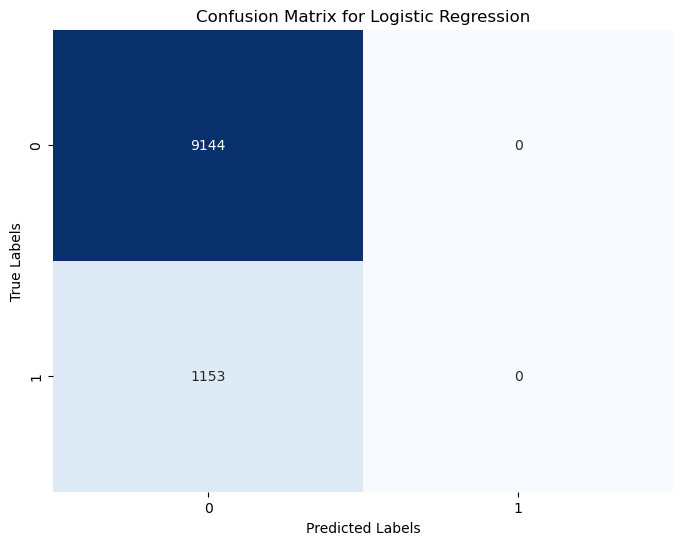

In [37]:
y_true = y_test
y_pred = model_LR.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Update the threshold to 0.2 to reduce false postivies

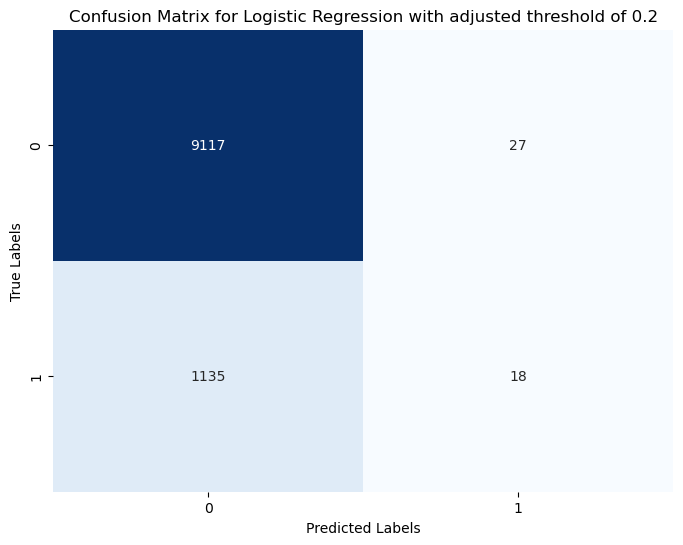

In [38]:
probabilities = model_LR.predict_proba(X_test)[:, 1]

# Define new threshold
threshold = 0.2  # Lowering the threshold to increase recall

# Apply threshold to positive probabilities to create binary outcomes
predictions = (probabilities >= threshold).astype(int)

cm = confusion_matrix(y_true, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression with adjusted threshold of 0.2')
plt.show()

In [39]:
model_DT = DecisionTreeClassifier()
start_time = time()
model_DT.fit(X_train, y_train)
train_time = time() - start_time
    
    # Training accuracy
train_accuracy = accuracy_score(y_train, model_DT.predict(X_train))
    
    # Testing accuracy
test_accuracy = accuracy_score(y_test, model_DT.predict(X_test))
    
    # Store results
results['Model'].append('Decision Tree without marital')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099


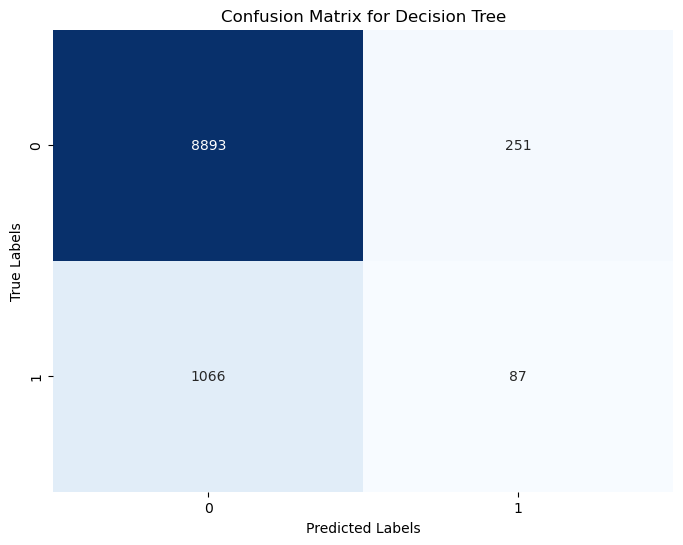

In [40]:
y_true = y_test
y_pred = model_DT.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [41]:
#SVC
start_time = time()
model_SVC = Pipeline([
        ('scaler', StandardScaler()), 
        ('model', SVC(probability = True, max_iter=10000))
    ])

model_SVC.fit(X_train, y_train)
train_time = time() - start_time

C:\Users\Shadow\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [42]:
train_accuracy = accuracy_score(y_train, model_SVC.predict(X_train))
    
    # Testing accuracy
test_accuracy = accuracy_score(y_test, model_SVC.predict(X_test))

results['Model'].append('SVM without marital')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123


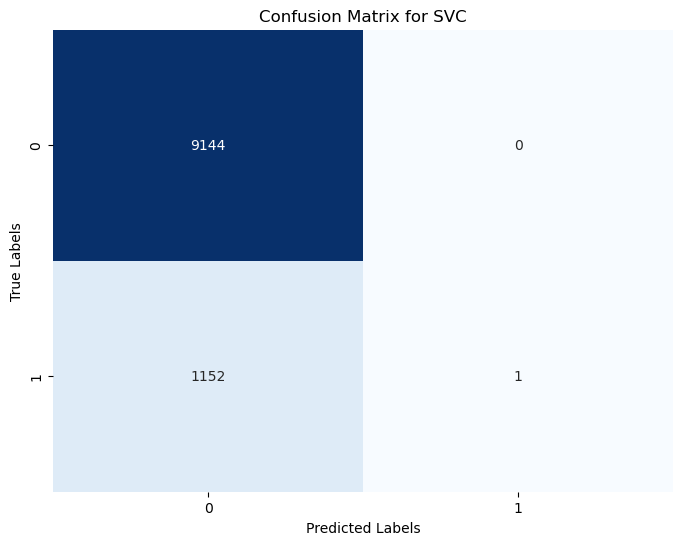

In [43]:
y_true = y_test
y_pred = model_SVC.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVC')
plt.show()

In [44]:
#KNN5
start_time = time()
model_KNN5 = Pipeline([
    ('scale', StandardScaler()), 
    ('model', KNeighborsClassifier(n_neighbors=5))
]).fit(X_train, y_train)

train_time = time() - start_time  

train_accuracy = model_KNN5.score(X_train, y_train)
test_accuracy = model_KNN5.score(X_test, y_test)
print(f"Training Time for KNN5: {train_time:.4f} seconds")
print(f"Training Accuracy for KNN5: {train_accuracy:.4f}")
print(f"Test Accuracy for KNN5: {test_accuracy:.4f}")


Training Time for KNN5: 0.1165 seconds
Training Accuracy for KNN5: 0.8880
Test Accuracy for KNN5: 0.8759


In [45]:
results['Model'].append('KNN5 without marital')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123
7,KNN5 without marital,0.116499,0.888026,0.875886


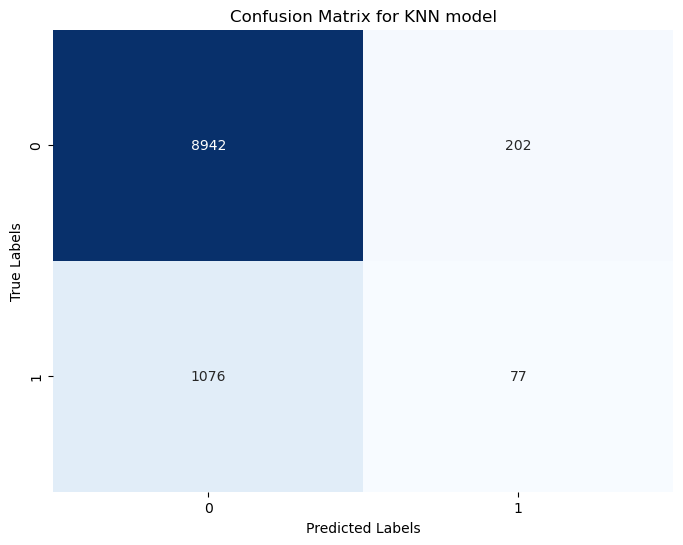

In [46]:
y_true = y_test
y_pred = model_KNN5.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN model')
plt.show()

### Grid search - Decision Tree - Slight Improvement

In [47]:
# Decision tree improvement
start_time = time()
param_grid = {
    'max_depth': [None, 3, 5, 10, 20, 30, 50, 100]
}

best_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', verbose=1)

best_model_DT.fit(X_train, y_train)
train_time = time()-start_time
# Using the best estimator directly
y_pred = best_model_DT.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Test accuracy: 0.8877342915412256


In [48]:
train_accuracy = best_model_DT.score(X_train, y_train)
test_accuracy = best_model_DT.score(X_test, y_test)
results['Model'].append('Grid Search Decision Tree')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123
7,KNN5 without marital,0.116499,0.888026,0.875886
8,Grid Search Decision Tree,2.286001,0.887443,0.887734


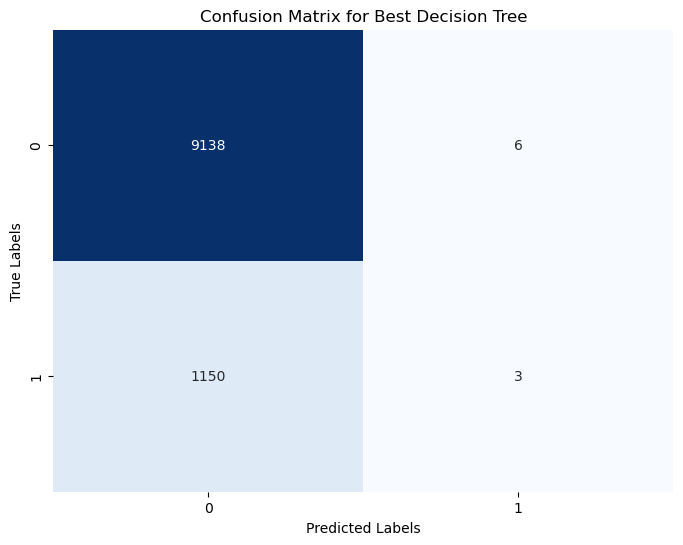

In [49]:
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Best Decision Tree')
plt.show()

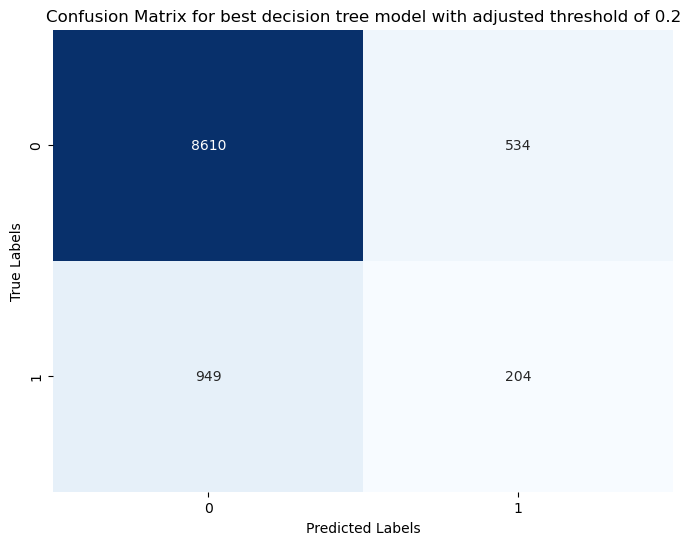

In [50]:
probabilities = best_model_DT.predict_proba(X_test)[:, 1]

# Define new threshold
threshold = 0.2  # Lowering the threshold to increase recall

# Apply threshold to positive probabilities to create binary outcomes
predictions = (probabilities >= threshold).astype(int)

cm = confusion_matrix(y_true, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best decision tree model with adjusted threshold of 0.2')
plt.show()

### Grid Search - Logistic Regression - Little Improvement

In [51]:
# Improve Logistic Regression
start_time = time()

pipeline = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='log_loss',  # Correct loss parameter
                  penalty='l2',     # L2 regularization
                  alpha=0.0001,     # Regularization strength
                  max_iter=1000,    # Maximum number of epochs
                  tol=1e-3,         # Stopping criterion
                  random_state=42)  # Seed for reproducibility
)

# Fit the model
pipeline.fit(X_train, y_train)
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__max_iter': [1000, 5000, 10000]
}

# Grid search with cross-validation
best_model_LR = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
best_model_LR.fit(X_train, y_train)
train_time = time() - start_time

In [52]:
train_accuracy = best_model_LR.score(X_train, y_train)
test_accuracy = best_model_LR.score(X_test, y_test)
results['Model'].append('Grid Search Logistic Regression')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123
7,KNN5 without marital,0.116499,0.888026,0.875886
8,Grid Search Decision Tree,2.286001,0.887443,0.887734
9,Grid Search Logistic Regression,3.565998,0.887119,0.888026


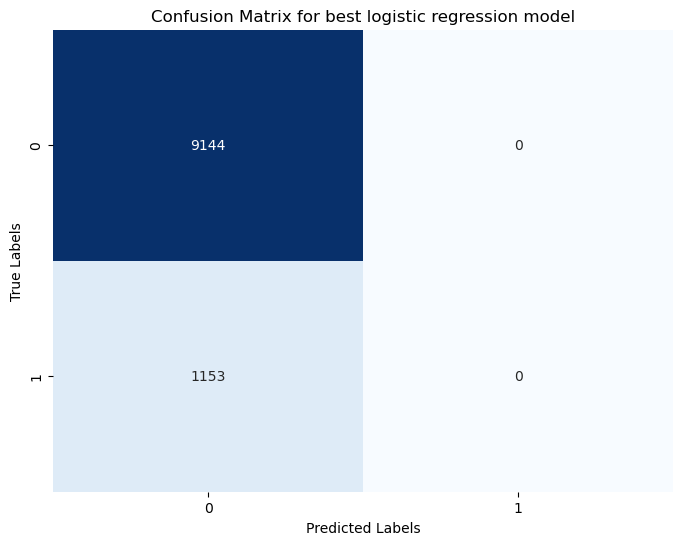

In [53]:
y_true = y_test
y_pred = best_model_LR.predict(X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best logistic regression model')
plt.show()

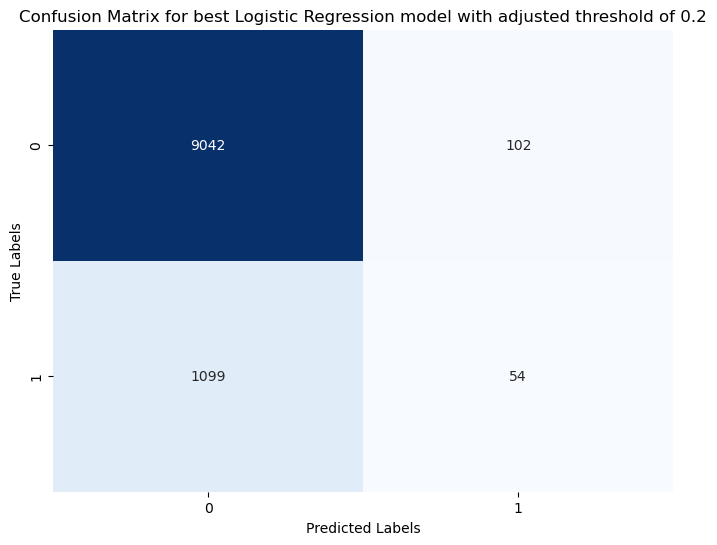

In [54]:
probabilities = best_model_LR.predict_proba(X_test)[:, 1]

# Define new threshold
threshold = 0.2  # Lowering the threshold to increase recall

# Apply threshold to positive probabilities to create binary outcomes
predictions = (probabilities >= threshold).astype(int)

cm = confusion_matrix(y_true, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best Logistic Regression model with adjusted threshold of 0.2')
plt.show()

### Grid Search - KNN62 - Little Improvement. 

In [55]:
#Improve KNN
start_time = time()
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': range(1, 100)
}
best_model_KNN = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
best_model_KNN.fit(X_train, y_train)

train_time = time()-start_time
print("Best parameters:", best_model_KNN.best_params_)

# Using the best estimator directly
y_pred = best_model_KNN.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best parameters: {'knn__n_neighbors': 62}
Test accuracy: 0.8882198698650092
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9144
           1       0.55      0.01      0.02      1153

    accuracy                           0.89     10297
   macro avg       0.72      0.50      0.48     10297
weighted avg       0.85      0.89      0.84     10297



In [56]:
train_accuracy = best_model_KNN.score(X_train, y_train)
test_accuracy = best_model_KNN.score(X_test, y_test)
results['Model'].append('Grid Search KNN')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123
7,KNN5 without marital,0.116499,0.888026,0.875886
8,Grid Search Decision Tree,2.286001,0.887443,0.887734
9,Grid Search Logistic Regression,3.565998,0.887119,0.888026


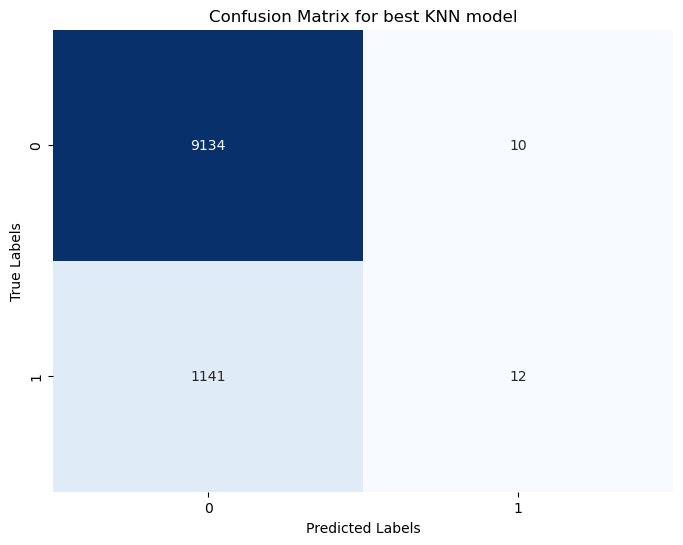

In [57]:
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best KNN model')
plt.show()

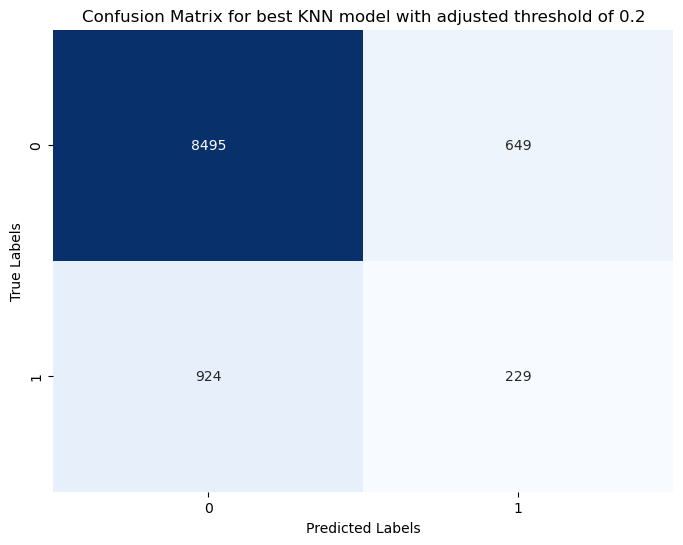

In [58]:
probabilities = best_model_KNN.predict_proba(X_test)[:, 1]

# Define new threshold
threshold = 0.2  # Lowering the threshold to increase recall

# Apply threshold to positive probabilities to create binary outcomes
predictions = (probabilities >= threshold).astype(int)

cm = confusion_matrix(y_true, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best KNN model with adjusted threshold of 0.2')
plt.show()

### Grid Search SVC - Little Improvement

In [59]:
# Improve SVC
# Fit GridSearchCV
start_time = time()
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability = True))
])
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf']
}
best_model_SVC = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=1)
best_model_SVC.fit(X_train, y_train)

train_time = time() - start_time

# Best estimator and parameters
print("Best parameters:", best_model_SVC.best_params_)
print("Best cross-validation score: {:.2f}".format(best_model_SVC.best_score_))

# Evaluate on the test set
y_pred = best_model_SVC.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best cross-validation score: 0.89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9144
           1       0.67      0.01      0.01      1153

    accuracy                           0.89     10297
   macro avg       0.78      0.50      0.48     10297
weighted avg       0.86      0.89      0.84     10297



In [60]:
train_accuracy = best_model_SVC.score(X_train, y_train)
test_accuracy = best_model_SVC.score(X_test, y_test)
results['Model'].append('Grid Search SVC')
results['Train Time'].append(train_time)
results['Train Accuracy'].append(train_accuracy)
results['Test Accuracy'].append(test_accuracy)
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.517498,0.887054,0.888220
1,Decision Tree,0.101504,0.917743,0.865980
2,SVM,156.403996,0.887281,0.888220
3,KNN5,0.132501,0.890615,0.878023
4,Logic Regression without marital,0.194499,0.887119,0.888026
5,Decision Tree without marital,0.088497,0.908323,0.872099
6,SVM without marital,150.168004,0.887152,0.888123
7,KNN5 without marital,0.116499,0.888026,0.875886
8,Grid Search Decision Tree,2.286001,0.887443,0.887734
9,Grid Search Logistic Regression,3.565998,0.887119,0.888026


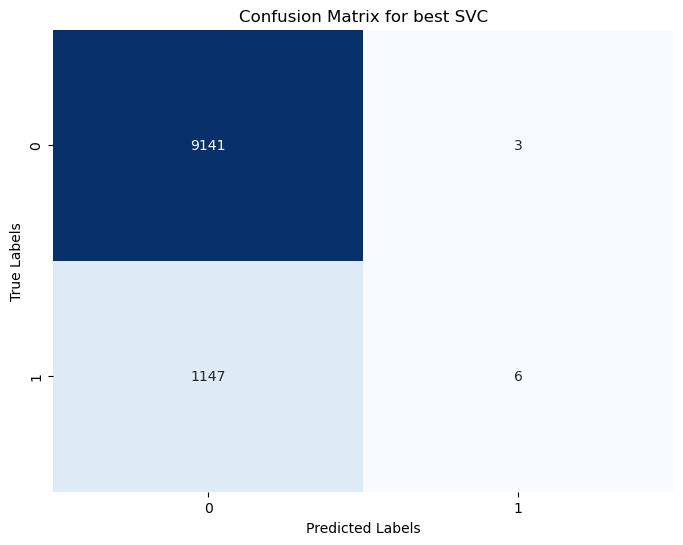

In [61]:
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best SVC')
plt.show()

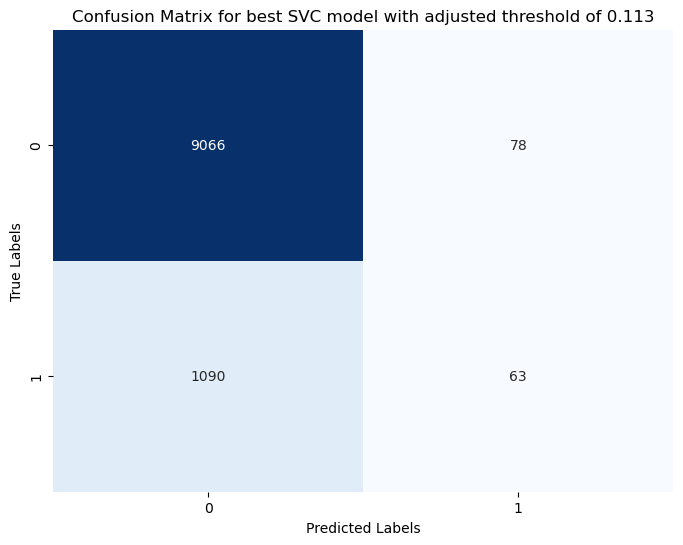

In [62]:
probabilities = best_model_SVC.predict_proba(X_test)[:, 1]

# Define new threshold
threshold = 0.113  # Lowering the threshold to increase recall

# Apply threshold to positive probabilities to create binary outcomes
predictions = (probabilities >= threshold).astype(int)

cm = confusion_matrix(y_true, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for best SVC model with adjusted threshold of 0.113')
plt.show()

##### Questions
The models' accuracies exhibit little improvement. It is conceivable that there is no apparent link between the input features and the output. Adjusting thresholds may increase the likelihood of identifying positive candidates, but most of the positive candidates will still be missed. 